In [1]:
# IO
import os

# Data
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import cmcrameri  # nice colormaps
import astropy.units as u

In [2]:
from thesis.io import mesa
from thesis.physics import first_adiabatic_exponent, sound_speed, acoustic_depth, structure_kernel
from thesis.calculus import differentiate

In [3]:
root_path = "/Users/ajl573/OneDrive/Data/MESA/solar_models/y0.28/"
profile_filename = "profile.data"
gyre_dir = "gyre"
gyre_suffix = "GYRE"

In [4]:
filename = os.path.join(root_path, profile_filename)
profile = mesa.load_dataset(filename, kind="profile")
profile

<xarray.Dataset>
Dimensions:                 (zone: 763)
Coordinates:
  * zone                    (zone) int64 1 2 3 4 5 6 ... 758 759 760 761 762 763
Data variables:
    mass                    (zone) float64 1.0 1.0 1.0 ... 1.563e-07 7.813e-08
    logR                    (zone) float64 0.006006 0.006005 ... -2.936 -3.036
    logT                    (zone) float64 3.755 3.756 3.757 ... 7.19 7.19 7.19
    logRho                  (zone) float64 -6.788 -6.782 -6.776 ... 2.151 2.151
    logP                    (zone) float64 4.783 4.79 4.798 ... 17.35 17.35
    x_mass_fraction_H       (zone) float64 0.7304 0.7304 ... 0.3762 0.3762
    y_mass_fraction_He      (zone) float64 0.2515 0.2515 ... 0.6027 0.6027
    z_mass_fraction_metals  (zone) float64 0.0181 0.0181 ... 0.02109 0.02109
    acoustic_depth          (zone) float64 0.0 0.2495 ... 3.601e+03 3.601e+03
    pp                      (zone) float64 2.602e-26 2.638e-26 ... 15.44 15.44
    cno                     (zone) float64 0.0 0.0 0.0 0.0 ... 1.441 1.441 1.442
    tri_alpha               (zone) float64 0.0 0.0 0.0 ... 8.281e-41 8.287e-41
Attributes: (12/49)
    model_number:            211
    num_zones:               763
    initial_mass:            1.0
    initial_z:               0.02
    star_age:                4073344465.7814794
    time_step:               116394271.99836661
    ...                      ...
    MESA_SDK_version:        "x86_64-linux-22.6.1"
    math_backend:            "CRMATH"
    date:                    "20230117"
    msun:                    1.9884098706980504e+33
    rsun:                    69570000000.0
    lsun:                    3.828e+33

In [5]:
filename = os.path.join(root_path, ".".join([profile_filename, gyre_suffix]))
model = mesa.load_dataset(filename, kind="gyre")
model

<xarray.Dataset>
Dimensions:          (k: 1046)
Coordinates:
  * k                (k) int64 1 2 3 4 5 6 7 ... 1041 1042 1043 1044 1045 1046
Data variables: (12/18)
    r                (k) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    m                (k) float64 0.0 1.554e+26 3.107e+26 ... 1.988e+33 1.988e+33
    L_r              (k) float64 0.0 2.625e+27 5.25e+27 ... 3.695e+33 3.695e+33
    P                (k) float64 2.22e+17 2.22e+17 2.22e+17 ... 93.64 91.76
    T                (k) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    rho              (k) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    ...               ...
    kappa_kappa_T    (k) float64 -2.505 -2.505 -2.505 -2.505 ... 0.0 0.0 0.0 0.0
    kappa_kappa_rho  (k) float64 0.4763 0.4764 0.4764 0.4764 ... 0.0 0.0 0.0 0.0
    eps              (k) float64 16.88 16.88 16.88 16.88 ... 0.0 0.0 0.0 0.0
    eps_eps_T        (k) float64 201.5 201.5 201.5 201.5 ... 0.0 0.0 0.0 0.0
    eps_eps_rho      (k) float64 17.76 17.76 17.76 17.76 ... 0.0 0.0 0.0 0.0
    Omega            (k) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    n:        1046
    M:        1.9884098706980504e+33
    R:        70538857450.55437
    L:        3.695049456876695e+33
    version:  101

In [6]:
path = os.path.join(root_path, gyre_dir, ".".join([profile_filename, gyre_suffix, "h5"]))
pulse = xr.load_dataset(path, engine="h5netcdf")
pulse

<xarray.Dataset>
Dimensions:  (k: 1046, n_pg: 36, l: 3)
Coordinates:
  * k        (k) int64 1 2 3 4 5 6 7 8 ... 1040 1041 1042 1043 1044 1045 1046
  * l        (l) int64 0 1 2
  * n_pg     (n_pg) int64 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
Data variables:
    As       (k, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    E_norm   (n_pg, l) float64 0.005267 nan 0.002007 ... 8.809e-09 nan nan
    Gamma_1  (k, n_pg, l) float64 1.665 nan 1.665 1.665 ... 1.614 1.614 nan nan
    V_2      (k, n_pg, l) float64 125.5 nan 125.5 125.5 ... 5.896e+03 nan nan
    c_1      (k, n_pg, l) float64 0.009556 nan 0.009556 ... 1.003 nan nan
    freq     (n_pg, l) complex128 (255.42893986783676+0j) (nan+0j) ... (nan+0j)
    x        (k, n_pg, l) float64 0.0 nan 0.0 0.0 0.0 ... 1.001 1.001 nan nan
    xi_h     (k, n_pg, l) complex128 0j (nan+0j) 0j 0j ... 0j (nan+0j) (nan+0j)
    xi_r     (k, n_pg, l) complex128 0j (nan+0j) 0j ... (nan+0j) (nan+0j)
Attributes:
    freq_units:  UHZ
    label:

## First Adiabatic Exponent

Using model from Houdeyer et al. (2021).

In [7]:
n = 101
log_T_range = (3.5, 6.0)
log_rho_range = (-12.0, 0.0)
log_T = np.linspace(*log_T_range, n)
log_rho = np.linspace(*log_rho_range, n)

log_coords = np.meshgrid(log_T, log_rho)
coords = np.power(10, log_coords)

In [29]:
Y = profile.y_mass_fraction_He.sel(zone=1).values
gamma1_grid = first_adiabatic_exponent(*coords.reshape((2, n**2)), Y)
gamma1_at_coords = gamma1_grid.reshape((n, n))

In [9]:
def latex_inline(unit):
    return unit.to_string("latex_inline")

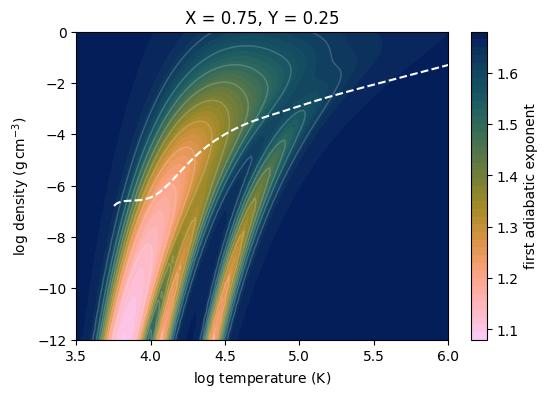

In [10]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

cf = ax.contourf(*log_coords, gamma1_at_coords, levels=51, cmap="cmc.batlow_r")

ax.contour(*log_coords, gamma1_at_coords, levels=9, colors="white", alpha=0.2, linewidths=1.0)

ax.plot(profile.logT, profile.logRho, "--", color="white")
ax.set_xlabel(f"log temperature ({latex_inline(u.K)})")
ax.set_ylabel(f"log density ({latex_inline(u.g / u.cm**3)})")

ax.set_xlim(log_T_range)
ax.set_ylim(log_rho_range)
ax.set_title(f"X = {1 - Y:.2f}, Y = {Y:.2f}")

cbar = plt.colorbar(cf)
cbar.set_ticks(np.arange(1.1, 1.7, 0.1))
cbar.set_label("first adiabatic exponent");

## Pulsation profiles

In [11]:
model["cs"] = sound_speed(model.Gamma_1, model.P, model.rho)
model["tau"] = acoustic_depth(model.r, model.cs)
model

<xarray.Dataset>
Dimensions:          (k: 1046)
Coordinates:
  * k                (k) int64 1 2 3 4 5 6 7 ... 1041 1042 1043 1044 1045 1046
Data variables: (12/20)
    r                (k) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    m                (k) float64 0.0 1.554e+26 3.107e+26 ... 1.988e+33 1.988e+33
    L_r              (k) float64 0.0 2.625e+27 5.25e+27 ... 3.695e+33 3.695e+33
    P                (k) float64 2.22e+17 2.22e+17 2.22e+17 ... 93.64 91.76
    T                (k) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    rho              (k) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    ...               ...
    eps              (k) float64 16.88 16.88 16.88 16.88 ... 0.0 0.0 0.0 0.0
    eps_eps_T        (k) float64 201.5 201.5 201.5 201.5 ... 0.0 0.0 0.0 0.0
    eps_eps_rho      (k) float64 17.76 17.76 17.76 17.76 ... 0.0 0.0 0.0 0.0
    Omega            (k) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    cs               (k) float64 5.111e+07 5.111e+07 ... 7.165e+05 7.164e+05
    tau              (k) float64 3.71e+03 3.709e+03 ... 0.3365 -1.819e-12
Attributes:
    n:        1046
    M:        1.9884098706980504e+33
    R:        70538857450.55437
    L:        3.695049456876695e+33
    version:  101

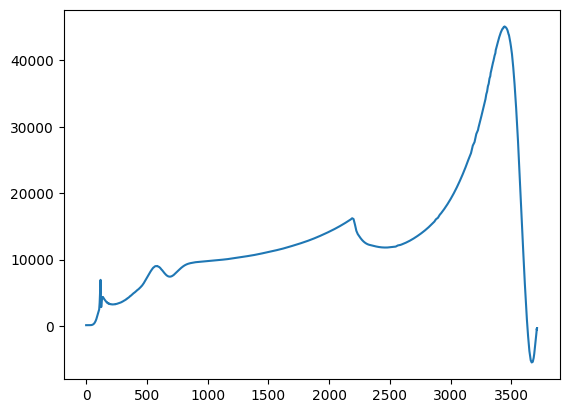

In [12]:
fig, ax = plt.subplots()

ax.plot(model.tau, differentiate(model.cs, model.tau));

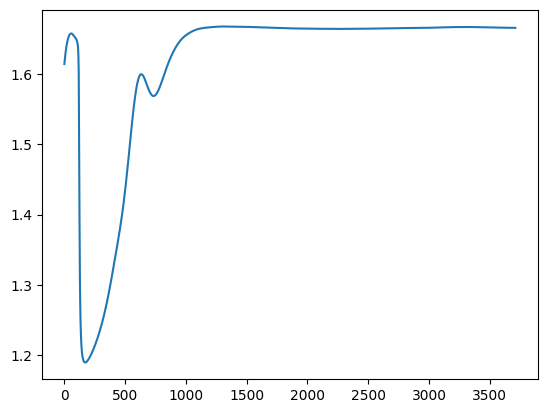

In [13]:
fig, ax = plt.subplots()

ax.plot(model.tau, model.Gamma_1);

How does this compare to that of the model from Houdeyer et al. (2021)

In [14]:
from scipy.interpolate import interp1d

In [15]:
r = 10**profile.logR
x = r / r.max()

gamma1 = first_adiabatic_exponent(10**profile.logT, 10**profile.logRho, profile.y_mass_fraction_He)
gamma1_func = interp1d(x, gamma1, kind="cubic", bounds_error=False)

In [16]:
x = model.r/model.R
gamma1_model = gamma1_func(x)

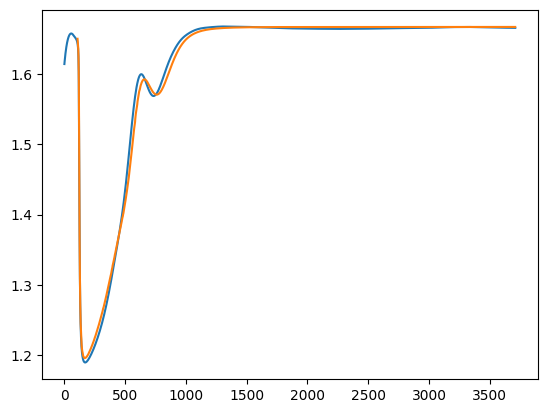

In [17]:
fig, ax = plt.subplots()

ax.plot(model.tau, model.Gamma_1);
ax.plot(model.tau, gamma1_model);

In [18]:
r = 10**profile.logR
x = r / r.max()

gamma10 = first_adiabatic_exponent(10**profile.logT, 10**profile.logRho, 0.0)
gamma10_func = interp1d(x, gamma10, kind="cubic", bounds_error=False)

In [19]:
x = model.r/model.R
gamma10_model = gamma10_func(x)

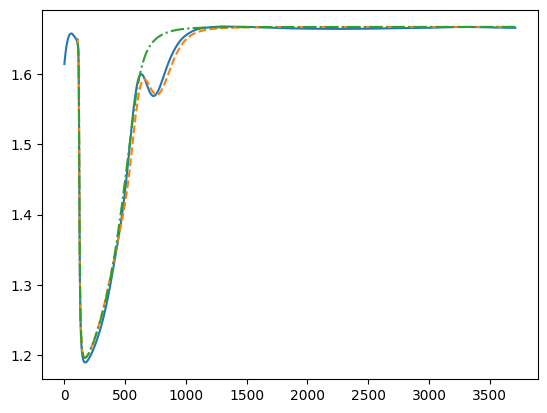

In [20]:
fig, ax = plt.subplots()

ax.plot(model.tau, model.Gamma_1);
ax.plot(model.tau, gamma1_model, "--");
ax.plot(model.tau, gamma10_model, "-.");

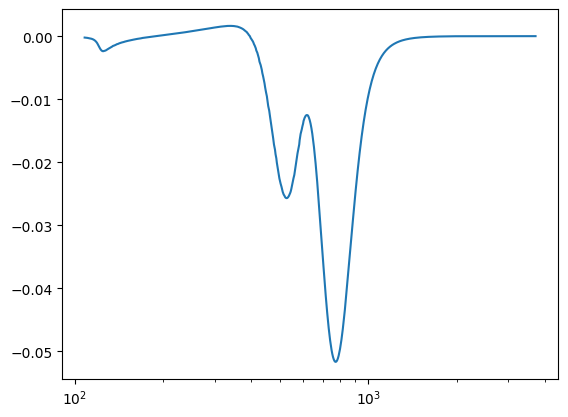

In [21]:
fig, ax = plt.subplots()

ax.plot(model.tau, (gamma1_model - gamma10_model) / gamma1_model);
ax.set_xscale("log")

In [22]:
K = structure_kernel(pulse, model)
K_c2_rho, K_rho_c2 = K["c2_rho"]
K_G1_rho, K_rho_G1 = K["G1_rho"]

In [23]:
def plot_kernels(K, l=0, n_pg=21, key="c2_rho"):
    subs = key.split("_")
    nrows = 2
    fig, axes = plt.subplots(nrows, figsize=(6, 8), sharex=True, gridspec_kw={"hspace": 0.1})

    for i in range(nrows):
        ax = axes[i]
        y = model.R*K[key][i].sel(n_pg=n_pg, l=l)
        ax.plot(model.tau, y)
        ax.set_ylabel(f"scaled kernel [{', '.join(subs[::1 if i==0 else -1])}]")
    ax.set_xlabel("acoustic depth (s)")
    return fig

The kernels show the sensitivity of omega to a change in structure. E.g. a change in sound speed squared at fixed density.

Or a change in density at fixed sound speed.

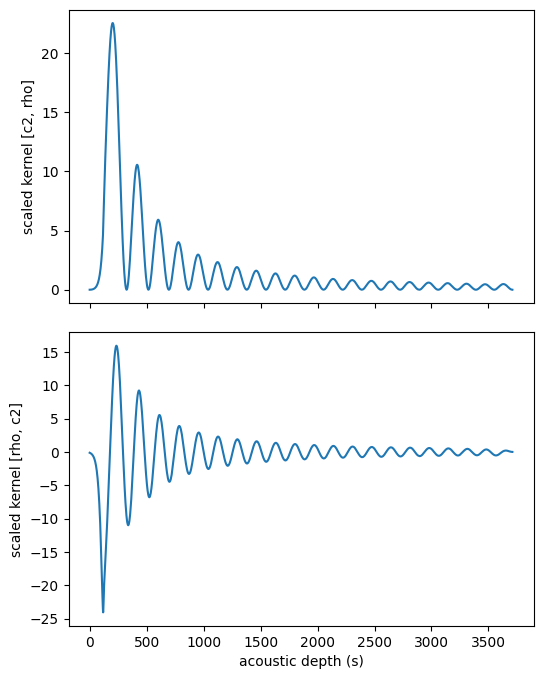

In [24]:
plot_kernels(K);

These would be integrated over to get the total change in omega due to changes in both sound speed and density. The latter would probably integrate out to zero, but the first would have a greater effect.

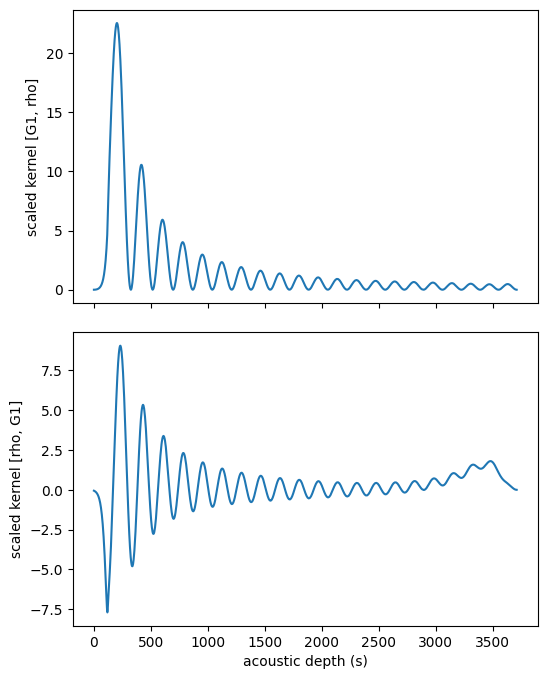

In [25]:
plot_kernels(K, key="G1_rho");

## To do

* Get MESA to output FGONG so we can use the Gamma1 derivatives
* GYRE will have to take in FGONG file_format now!
* Remove Gamma_1 from GYRE output, not needed!
* Or just use Tomso CLI to convert from FGONG to GYRE format
* Use Tomso to import FGONG to turn into model
* Note, Tomso goes from surface to centre